In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [2]:
ceo_pay = pd.read_csv('C:/Users/GL-FF-CR1/Desktop/CEO base pay.csv')

In [3]:
ceo_pay.head()

,Base_Pay,Revenue
0,151.81,76328000
1,148.29,57000000
2,101.65,51000000
3,100.00,50897721
4,95.59,45493200


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

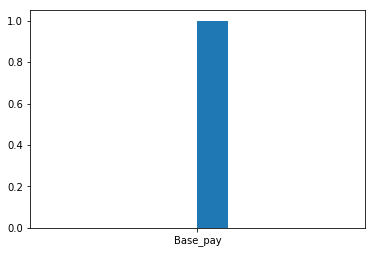

In [4]:
plt.hist('Base_pay', data=ceo_pay)

(array([7., 3., 1., 1., 0., 1., 3., 0., 0., 1.]),
 array([12296908.        , 18700017.2       , 25103126.4       ,
        31506235.6       , 37909344.8       , 44312454.        ,
        50715563.2       , 57118672.4       , 63521781.6       ,
        69924890.80000001, 76328000.        ]),
 <a list of 10 Patch objects>)

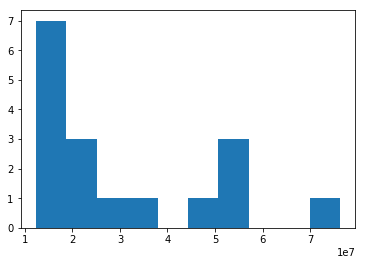

In [5]:
plt.hist('Revenue', data=ceo_pay)

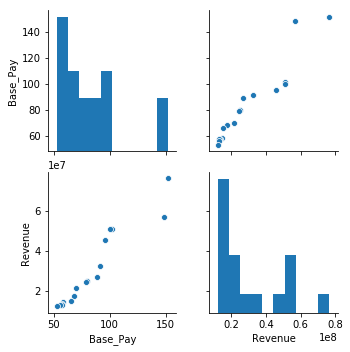

In [6]:
sns.pairplot(ceo_pay)

In [7]:
ceo_pay.corr()

,Base_Pay,Revenue
Base_Pay,1.000000,0.952679
Revenue,0.952679,1.000000


In [10]:
import scipy
from scipy import stats

In [11]:
pearson_coef, p_value = stats.pearsonr(ceo_pay['Base_Pay'], 
                                       ceo_pay['Revenue'])


In [12]:
print("The Pearson Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value) 

The Pearson Correlation Coefficient is 0.952678719731967  with a P-value of P = 3.6965958338429236e-09


# Partitioning the data

In [24]:
X = ceo_pay.loc[:,['Revenue']].values
y = ceo_pay.loc[:,['Base_Pay']].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
X_train[0:5],X_test[0:5],y_train[0:5],y_test[0:5]

(array([[13504173],
        [45493200],
        [51000000],
        [13126413],
        [17609573]], dtype=int64), array([[57000000],
        [26987146],
        [24587000],
        [21500000]], dtype=int64), array([[ 57.69],
        [ 95.59],
        [101.65],
        [ 57.52],
        [ 68.  ]]), array([[148.29],
        [ 88.95],
        [ 78.76],
        [ 69.75]]))

# Building Regression Equation

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
Regression_Model = LinearRegression()

##Fitting Regression model to train set

In [32]:
Regression_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# Predicting the Test set results
y_predict = Regression_Model.predict(X_test)

In [35]:
y_predict

array([[116.96408067],
       [ 76.65446156],
       [ 73.43087706],
       [ 69.28479371]])

# Regression Diagnostics

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
Regression_Model.coef_

array([[1.34307851e-06]])

In [39]:
Regression_Model.intercept_

array([40.40860584])

## Regression Equation is Base_Pay = 40.40 + 1.34 * Revenue

In [43]:
# Rsquare values

In [40]:
Regression_Model.score(X_train,y_train)

0.9589285334087132

In [41]:
Regression_Model.score(X_test,y_test)

0.6919693737198943

In [42]:
Regression_Model.score(X_test,y_predict)

1.0

In [45]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))

Mean squared error: 290.28


In [46]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predict))

Variance score: 0.69


Text(0.5, 1.0, 'Comparision between Actual Pay & Predicted Pay')

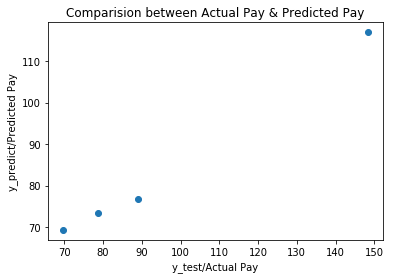

In [55]:
plt.scatter(y_test,y_predict)
plt.xlabel("y_test/Actual Pay")
plt.ylabel("y_predict/Predicted Pay")
plt.title("Comparision between Actual Pay & Predicted Pay")


Conclusion: We can infer that the CEO deserves a pay of around $ 75 per hour and we are over paying him

## MIS Report

In [58]:
y_test
y_predict
#--------------------------------------
y_test2 = pd.DataFrame(y_test)

y_pred2 = pd.DataFrame(y_predict)
#----------------------------------------
y_test2.index = y_pred2.index

result = pd.concat((y_test2,y_pred2),join = 'outer', axis=1)

#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
Result = pd.concat([y_test2,y_pred2],axis=1, join_axes=[y_test2.index])

In [59]:
Result

,0,0
0,148.29,116.964081
1,88.95,76.654462
2,78.76,73.430877
3,69.75,69.284794
